# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

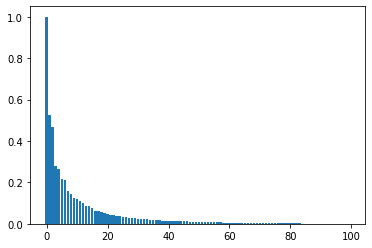

In [2]:
# Samples corresponding to the last digit of your roll number (plot a)
# def gen_sample(train_data, train_labels, last_digit):
#     no_data_pts, dimension = train_data.shape[0], train_data.shape[1]
#     no_sample_pts = 0
#     for index in range(no_data_pts):
#         if train_labels[index] == last_digit:
#             no_sample_pts = no_sample_pts + 1
            
#     sample = np.empty((no_sample_pts, dimension))
#     sample_index = 0
    
#     for index in range(no_data_pts):
#         if train_labels[index] == last_digit:
#             sample[sample_index] = train_data[index]
#             sample_index = sample_index + 1
#     sample = sample.T
#     return sample

def plot(sample, no_eigval, eigen_val):
    eigen_val = np.sort(eigen_val)
    eigen_val = eigen_val[::-1]
    eigen_val = eigen_val[0:no_eigval]
    eigen_max, eigen_min = eigen_val[0], eigen_val[no_eigval-1]
    eigen_val = (eigen_val - eigen_min)/(eigen_max - eigen_min)
    x_values = np.arange(no_eigval)
    plt.bar(x_values, eigen_val[0:no_eigval])
    plt.show()
    
sample = train_data[np.where(train_labels == 9)]
cov_sample = np.cov(sample.T)
eig_sample = np.linalg.eig(cov_sample)
plot(sample, 100, eig_sample[0].real)

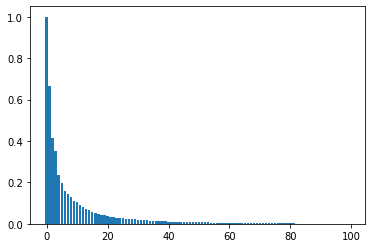

In [3]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
sample = train_data[np.where(train_labels == 0)]
cov_sample = np.cov(sample.T)
eig_sample = np.linalg.eig(cov_sample)
plot(sample, 100, eig_sample[0].real)

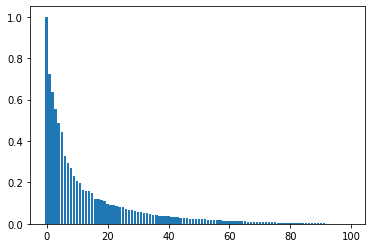

In [4]:
# All training data (plot c)
full_data = train_data.T
cov_train = np.cov(full_data)
eig_train = np.linalg.eig(cov_train)
plot(train_data, 100, eig_train[0].real)

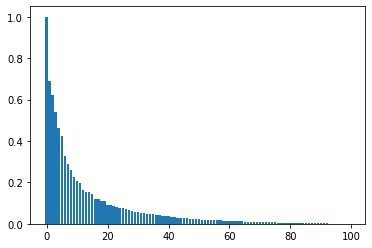

In [5]:
# Randomly selected 50% of the training data (plot d)
random_sample = train_data[ np.random.choice(train_data.shape[0], train_data.shape[0]//2, replace=False), :]
# a = [ [1,2], [3,4], [4,5], [6,7] ] 
# a = np.array(a)
# #print(a)
#print( a[ np.random.choice(a.shape[0], 2, replace=False), :] )
eig_rand = np.linalg.eig(np.cov(random_sample.T))
plot(random_sample, 100, eig_rand[0].real)

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit)
1) Plots of a and b except for some inital points are quite similar to each other. This is because the data points ( dimension = 784 ) corresponding to the labels '0' and  '9' respectively are similar in values.

2) Plots of b and c are different. This is because plot c takes all the data points of our training data while plot b considers only the label '0'. Beacuse of this eigenvalues are different hence the eigenspectrum is different.
3) Approximate ranks for plot a, b, c and d are respectively 42, 42, 63, 63. This is computed by observing the number of non-zero eigenvalues in the plots shown above.

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)
1) 2^784
2) (7000/2^784)*100
3) For the case where we have access to all of the data, the spread of data would be uniform in each dimension. Hence 
   there is symmetry in our spread of data in each of the possible directions. Due to this symmetry, we will observe 
   that only one eigenvalue repeats n times.( n being the dimension of covariance matrix )
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)
Suppose A is our data matrix and S is the covariance matrix corresponding to it.
Suppose S1 is the covariance matrix corresponding to the orthonormal transformation of our data.
We know, S1 = A*S*A^T ( since each data x is being transformed to Ax )
Let eigendecomposition for S = MDM^-1 where M is the matrix constructed by taking each eigenvector of S as the column of M and D is the diagonal matrix with eigenvalues of S as its diagonal entries.
Hence, S1 = A*M*D*M^-1*A^T
Since, A^T = A^-1 Therefore, S1 = A*M*D*M^-1*A^-1 = (A*M)*D(A*M)^-1 - (1)
From (1) , we get the eigendecomposition for S1 with the same diagonal matrix D as in case of S. Hence, eigenvalues remain same after orthonormal transformation.

---

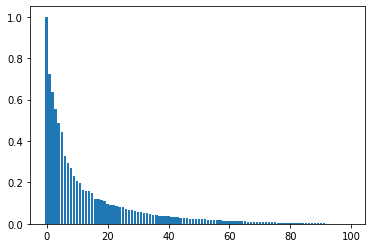

In [6]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
# code goes here

dim = 784
rand_matrix = np.random.rand(dim, dim)
ortho, nonortho = np.linalg.qr(rand_matrix)
def orthonormal_transform(train_data, ortho):
    no_data_pts = train_data.shape[0]
    transform_train_data = np.empty((train_data.shape[0], train_data.shape[1]))
    for i in range(no_data_pts):
        transform_train_data[i] = np.matmul(ortho, train_data[i])
    
    return transform_train_data

transform = orthonormal_transform(train_data, ortho)
cov_transform = np.cov(transform.T)
eig_transform = np.linalg.eig(cov_transform)
plot(transform, 100, eig_transform[0].real)

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)
If samples were multiplied by a rank deficient matrix, the rank of covariance matrix would  become the rank of the rank deficient matrix since rank(AB) - min(rank(A), rank(B)). Hence, the  values in the eigenspectrum would mostly be zero barring 1 or 2 values(depending on rank of matrix being multiplied).

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

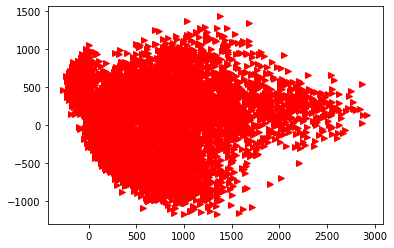

In [7]:
# plot code here
eigval, eigvec = np.linalg.eig(cov_train)
#print(eigvec.shape)
index_sort = np.argsort(eigval)[::-1]
eigvec1 = eigvec[:,index_sort[0]].real
eigvec2 = eigvec[:,index_sort[1]].real
#print(eigvec1)
x1 = np.matmul(train_data, eigvec1)
x2 = np.matmul(train_data, eigvec2)
#plt.axis([-90,40,-40,40])
plt.plot(x1, x2, '>', color='red')

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [8]:
# Print accuracy on the test set using MLE
def get_prob_from_gaussian(mean_class, cov_class, cov_inv, test_sample):
    x_minus_mean = test_sample - mean_class
    mahalanobis_dis = np.matmul(x_minus_mean, cov_inv)
    mahalanobis_dis = np.matmul(mahalanobis_dis, x_minus_mean.T)
    cov_det = np.linalg.det(cov_class)
    dim = cov_class.shape[0]
    log_term = -mahalanobis_dis/2 - 0.5*dim*np.log(2*np.pi) - 0.5*np.log(cov_det)
    return log_term
    
accuracy = 0
rank = 40
reduced_train_data = np.empty((train_data.shape[0], rank))
reduced_test_data = np.empty((test_data.shape[0], rank))
eff_eig_vec = np.empty((rank, train_data.shape[1]))

for i in range(rank):
    eff_eig_vec[i] = eigvec[:,index_sort[i]].real

eff_eig_vec = eff_eig_vec.T
reduced_train_data = np.matmul(train_data, eff_eig_vec)
reduced_test_data = np.matmul(test_data, eff_eig_vec)
cov_class = np.empty((10, reduced_train_data.shape[1], reduced_train_data.shape[1]))

for test_index in range(reduced_test_data.shape[0]):
    prob = -10**20
    class_label = -2
    for class_index in range(10):
        sample_class = reduced_train_data[np.where(train_labels==class_index)]
        cov_class[class_index] = np.cov(sample_class.T)
        mean_class = np.mean(sample_class, axis=0)
        cov_inv = np.linalg.inv(cov_class[class_index])
        log_term = get_prob_from_gaussian(mean_class, cov_class[class_index], cov_inv, reduced_test_data[test_index])
        if prob<log_term:
            prob = log_term
            class_label = class_index
    if test_labels[test_index] == class_label:
        accuracy = accuracy + 1

print((accuracy/1000)*100)

94.5


In [9]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
def get_prob_from_gaussian(mean_class, cov_class, cov_inv, test_sample):
    x_minus_mean = test_sample - mean_class
    mahalanobis_dis = np.matmul(x_minus_mean, cov_inv)
    mahalanobis_dis = np.matmul(mahalanobis_dis, x_minus_mean.T)
    cov_det = np.linalg.det(cov_class)
    dim = cov_class.shape[0]
    log_term = -mahalanobis_dis/2 - 0.5*dim*np.log(2*np.pi) - 0.5*np.log(cov_det) - np.log(10)
    return log_term
    
accuracy = 0
rank = 40
# # eigval, eigvec = np.linalg.eig(cov_train)
# reduced_train_data = np.empty((train_data.shape[0], rank))
# reduced_test_data = np.empty((test_data.shape[0], rank))
# #index_sort = np.argsort(eigval)[::-1]
# eff_eig_vec = np.empty((rank, train_data.shape[1]))

# for i in range(rank):
#     eff_eig_vec[i] = eigvec[:,index_sort[i]].real

# eff_eig_vec = eff_eig_vec.T
# reduced_train_data = np.matmul(train_data, eff_eig_vec)
# reduced_test_data = np.matmul(test_data, eff_eig_vec)
# cov_class = np.empty((10, reduced_train_data.shape[1], reduced_train_data.shape[1]))

for test_index in range(reduced_test_data.shape[0]):
    prob = -10**20
    class_label = -2
    for class_index in range(10):
        sample_class = reduced_train_data[np.where(train_labels==class_index)]
        cov_class[class_index] = np.cov(sample_class.T)
        mean_class = np.mean(sample_class, axis=0)
        cov_inv = np.linalg.inv(cov_class[class_index])
        log_term = get_prob_from_gaussian(mean_class, cov_class[class_index], cov_inv, reduced_test_data[test_index])
        if prob<log_term:
            prob = log_term
            class_label = class_index
    if test_labels[test_index] == class_label:
        accuracy = accuracy + 1

print((accuracy/1000)*100)

94.5


In [10]:
# Print accuracy using Bayesian pairwise majority voting method
def get_prob_from_gaussian(mean_class, cov_class, cov_inv, test_sample):
#     test_sample = test_sample.T
#     print(test_sample.shape)
    x_minus_mean = test_sample - mean_class
    #print(x_minus_mean.shape)
    mahalanobis_dis = np.matmul(x_minus_mean, cov_inv)
    mahalanobis_dis = np.matmul(mahalanobis_dis, x_minus_mean.T)
    cov_det = np.linalg.det(cov_class)
    dim = cov_class.shape[0]
    log_term = -mahalanobis_dis/2 - 0.5*dim*np.log(2*np.pi)
    return log_term
    
accuracy = 0
rank = 40
#eigval, eigvec = np.linalg.eig(cov_train)
# reduced_train_data = np.empty((train_data.shape[0], rank))
# reduced_test_data = np.empty((test_data.shape[0], rank))
# index_sort = np.argsort(eigval)[::-1]
# eff_eig_vec = np.empty((rank, train_data.shape[1]))

# for i in range(rank):
#     eff_eig_vec[i] = eigvec[:,index_sort[i]].real

# eff_eig_vec = eff_eig_vec.T
# reduced_train_data = np.matmul(train_data, eff_eig_vec)
# reduced_test_data = np.matmul(test_data, eff_eig_vec)
cov_class = np.empty((10, reduced_train_data.shape[1], reduced_train_data.shape[1]))
mean_class = np.empty((10, 1, reduced_train_data.shape[1]))

for i in range(10):
    sample_class = reduced_train_data[np.where(train_labels==i)]
    cov_class[i] = np.cov(sample_class.T)
    mean_class[i] = np.mean(sample_class, axis=0)

for test_index in range(reduced_test_data.shape[0]):
    prob = -10**20
    class_label = -2
    cnt_arr = np.zeros(10)
    #prob_arr = np.empty(10)
    for i in range(9):
        for j in range(i+1, 10):    
            cov_avg = (cov_class[i] + cov_class[j])/2
            #print(cov_avg.shape)
            mean_class_i = mean_class[i]
            #print(mean_class_i.shape)
            mean_class_j = mean_class[j]
            cov_avg_inv = np.linalg.inv(cov_avg)
            log_term_i = get_prob_from_gaussian(mean_class_i, cov_avg, cov_avg_inv, reduced_test_data[test_index].T)
            log_term_j = get_prob_from_gaussian(mean_class_j, cov_avg, cov_avg_inv, reduced_test_data[test_index].T)
            
            if log_term_i>log_term_j:
                cnt_arr[i]+=1
            else:
                cnt_arr[j]+=1
    cnt_index_sort = np.argsort(cnt_arr)[::-1]
    class_label = cnt_index_sort[0]
    if test_labels[test_index] == class_label:
        accuracy = accuracy + 1

print((accuracy/1000)*100)

88.2


In [11]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
def get_prob_from_gaussian(mean_class, cov_class, cov_inv, test_sample):
    x_minus_mean = ((test_sample - mean_class)**2).sum()
    return np.sqrt(x_minus_mean)
    
accuracy = 0
rank = 40
#eigval, eigvec = np.linalg.eig(cov_train)
# reduced_train_data = np.empty((train_data.shape[0], rank))
# reduced_test_data = np.empty((test_data.shape[0], rank))
# index_sort = np.argsort(eigval)[::-1]
# eff_eig_vec = np.empty((rank, train_data.shape[1]))

# for i in range(rank):
#     eff_eig_vec[i] = eigvec[:,index_sort[i]].real

# eff_eig_vec = eff_eig_vec.T
# reduced_train_data = np.matmul(train_data, eff_eig_vec)
# reduced_test_data = np.matmul(test_data, eff_eig_vec)
# cov_class = np.empty((10, reduced_train_data.shape[1], reduced_train_data.shape[1]))

for test_index in range(reduced_test_data.shape[0]):
    prob = -10**20
    class_label = -2
    cnt_arr = np.zeros(10)
    prob_arr = np.empty(10)
    for class_index in range(10):
        sample_class = reduced_train_data[np.where(train_labels==class_index)]
        cov_class[class_index] = np.cov(sample_class.T)
        mean_class = np.mean(sample_class, axis=0)
        cov_inv = np.linalg.inv(cov_class[class_index])
        log_term = get_prob_from_gaussian(mean_class, cov_class[class_index], cov_inv, reduced_test_data[test_index])
        prob_arr[class_index] = log_term
    
    for i in range(9):
        for j in range(i+1, 10):
            if prob_arr[i]<prob_arr[j]:
                cnt_arr[i]+=1
            else:
                cnt_arr[j]+=1
    cnt_index_sort = np.argsort(cnt_arr)[::-1]
    class_label = cnt_index_sort[0]
    if test_labels[test_index] == class_label:
        accuracy = accuracy + 1

print((accuracy/1000)*100)

76.0


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)
* The performance of MLE and MAP are similar. Since prior probability in MAP only adds a constant term to the gaussian, we get the same accuracies. Prior probability = 1/10 for each class(ASSUMPTION).

* MLE is better than than bayesian pairwise method because we take determinant of covariance matrix into account.
* The performance of bayesian pairwise method is better than perpendicular bisector method because mahalanobis distance is in general a better metric for distance in comparison to l2norm.
---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [12]:
# Your code here
# Print accuracies with K = 1, 3, 7\
def l2_distance(x, y):
    dists = -2 * np.dot(x, y.T) + np.sum(y**2, axis=1) + np.sum(x**2, axis=1)[:, np.newaxis]
    return dists

def getknn_accuracy(k):
    accuracy = 0
    test_range = test_data.shape[0]
    train_range = train_data.shape[0]
    for i in range(test_range):
        euc_dis = np.zeros((train_range,2))
        for j in range(train_range):
            dist = ((test_data[i] - train_data[j])**2).sum()
            euc_dis[j] = dist, train_labels[j]
            
        euc_dis = euc_dis[euc_dis[:,0].argsort()]
        cnt_arr = np.zeros(10)
        for index in range(k):
            cnt_arr[int(euc_dis[index][1])] += 1

        maxi = cnt_arr[int(euc_dis[0][1])]
        label = euc_dis[0][1]
        
        for index in range(k):
            if cnt_arr[ int(euc_dis[index][1]) ] > maxi:
                label = euc_dis[index][1]
                
        if label == test_labels[i]:
            accuracy = accuracy + 1
            
    return accuracy/test_data.shape[0]

accuracy = getknn_accuracy(1)
print(accuracy*100)
accuracy = getknn_accuracy(3)
print(accuracy*100)
accuracy = getknn_accuracy(7)
print(accuracy*100)

90.7
91.9
91.5


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)
Accuracies won't be same because in knn method we take the k nearest neighbours for a given test sample. The label asscociated with the nearest neighbour having maximum count gets assigned to the test sample.
We can start by taking k = 1 and then incrementing it's value. If the value of accuracy decreases at any particular step, we stop there.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [13]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [14]:
train_and_mixed = np.empty((train_data.shape[0]+mixed_data.shape[0], train_data.shape[1]))
train_and_mixed[0:train_data.shape[0]] = train_data
#print(train_and_mixed[0], train_data[0])
train_and_mixed[train_data.shape[0]:train_and_mixed.shape[0]] = mixed_data
#cnt_arr = np.zeros(train_and_mixed.shape[0])

def reverse_nn(k):
    train_data_range = train_data.shape[0]
    train_and_mixed_range = train_and_mixed.shape[0]
    cnt_arr = np.zeros(train_and_mixed.shape[0])
    euc_dis = l2_distance(train_data, train_and_mixed)
    
    for i in range(euc_dis.shape[0]):
        euc_sort = np.argsort(euc_dis[i])
        for j in range(1, k+1):
            cnt_arr[int(euc_sort[j])] += 1
        
    #print(euc_dis.shape)
    
#         euc_dis = euc_dis[euc_dis[:,0].argsort()]
#         for index in range(1, k+1):
#             cnt_arr[int(euc_dis[index][1])] += 1
            
    return cnt_arr
 
outliers = 0
cnt_arr = reverse_nn(1)
for i in range(train_and_mixed.shape[0]):
    if cnt_arr[i]==0:
        outliers += 1     
print(outliers)

outliers = 0
cnt_arr = reverse_nn(3)
for i in range(train_and_mixed.shape[0]):
    if cnt_arr[i]==0:
        outliers += 1     
print(outliers)

outliers = 0
cnt_arr = reverse_nn(7)
for i in range(train_and_mixed.shape[0]):
    if cnt_arr[i]==0:
        outliers += 1     
print(outliers)

# cnt_arr = reverse_nn(7)
# outliers = 0
# for i in range(train_data.shape[0], train_and_mixed.shape[0]):
#     if cnt_arr[i]==0:
#         outliers += 1     
# print(outliers)

2445
741
196


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)
Steps:
> We predict the classID using KNN method.
> Neatness score = modulus(predicted classID - actual classID)/10
> We sum over the neatness score over all the samples and divide it by total number of test samples.
---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [15]:
# Your code here
def getknn_accuracy(k):
    accuracy = 0
    count = 0
    test_range = test_data.shape[0]
    train_range = train_data.shape[0]
    for i in range(test_range):
        euc_dis = np.zeros((train_range,2))
        for j in range(train_range):
            dist = ((test_data[i] - train_data[j])**2).sum()
            euc_dis[j] = dist, train_labels[j]
            
        euc_dis = euc_dis[euc_dis[:,0].argsort()]
        cnt_arr = np.zeros(10)
        for index in range(k):
            cnt_arr[int(euc_dis[index][1])] += 1

        maxi = cnt_arr[int(euc_dis[0][1])]
        label = euc_dis[0][1]
        
        for index in range(k):
            if cnt_arr[ int(euc_dis[index][1]) ] > maxi:
                label = euc_dis[index][1]
                
        count = count + np.abs(label - test_labels[i])/10
            
    return count/test_data.shape[0]
accuracy = getknn_accuracy(1)
print(accuracy)
accuracy = getknn_accuracy(3)
print(accuracy)
accuracy = getknn_accuracy(7)
print(accuracy)

0.03540000000000002
0.030500000000000006
0.03360000000000002


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---